In [124]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
# Color scheme
color_scheme = ['#8ec07c', '#458588','#d79921', '#cc241d','#3c3836','#fffaf0']


## Aims of analysis
    - Predict user churn
    - Find the top predictors of user churn


### Data Loading
    - Data summary:
        - 14 columns (there are 2 "id" type columns), ~ 16.5k rows
        - no missing values
        - only 3 countries are represented in the dataset

In [126]:
df_og = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')

In [127]:
df_og.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [128]:
print(f'Data set shape: {df_og.shape}')

Data set shape: (165034, 14)


In [129]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [130]:
def data_cleanup(df):
    '''
    remove any unnecessary features, personal information etc
    '''
    df.drop(['id','CustomerId','Surname','Gender'],axis=1,inplace=True)
    return df

In [131]:
df_mod = data_cleanup(df_og)

In [132]:
# count of unique countries
df_mod['Geography'].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [133]:
df_mod.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


## Exploratory Data Analysis

### Univariate Data Analysis
    - goals:
        - explore the biases and spread of the target data
    - findings:
        - data is imbalanced, but should be acceptable given the ~ 80/20 distribution of the target variable

In [148]:
def univariate_distribuition(column, df):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.patch.set_facecolor(color_scheme[-1])
    hue_colors = [color_scheme[1],color_scheme[2]]
        
    value_counts = df[column].value_counts()
    ax1.pie(value_counts, labels=['Stayed', 'Churned'],autopct='%1.1f%%', colors=hue_colors)
    #p=plt.gcf()
    #p.gca().add_artist(center_circle)
    custom_params = {"axes.spines.right": False, "axes.spines.top": False,
                     'axes.facecolor':color_scheme[-1],
                     'figure.facecolor':color_scheme[-1],
                     'legend.frameon':False}
    sns.set_theme(style="ticks", rc=custom_params)
    p = sns.histplot(data=df,x=column,ax=ax2,palette=hue_colors, hue=column) 

    p.set(title=f'Count of {column}',
          xlabel=column,
          ylabel='Count')
    fig.tight_layout()
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

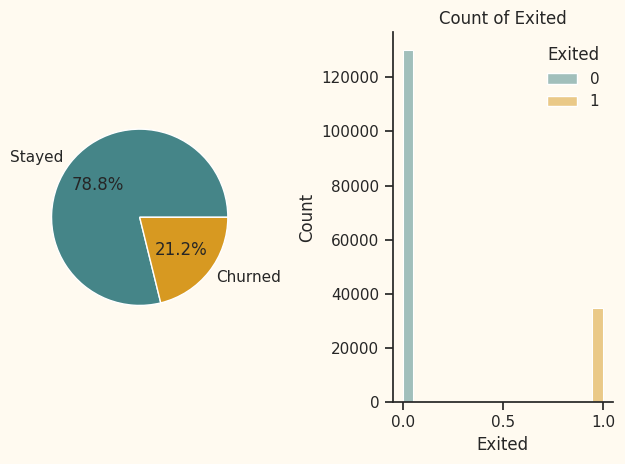

In [149]:
univariate_distribuition('Exited',df_mod)

### Bivariate Analysis
    - Goal:
        - estimate how much the predictor variables affect the target variable

In [168]:
def bivariate_plot(df,feat1, feat2, hue_feat=None,chart_type='bar',ax=None):
    fig = plt.figure()
    fig.patch.set_facecolor(color_scheme[-1])
    hue_colors = [color_scheme[1],color_scheme[2]]
    if chart_type=='bar':
        p = sns.barplot(data=df,x=feat1, y=feat2,hue=hue_feat,ax=ax,palette=hue_colors)
    elif chart_type=='scatter':
        p = sns.scatterplot(data=df,x=feat1, y=feat2,hue=hue_feat,ax=ax,s=5,palette=hue_colors)
        p.axhline(y=df[feat2].mean(),xmin=0,xmax=1,color=color_scheme[3],linestyle='dashed')
        plt.legend(labels=['', 'Stayed', 'Churned','Mean Age'])
    elif chart_type=='hist':
        p = sns.histplot(data=df,x=feat1, y=feat2,hue=hue_feat,ax=ax,palette=hue_colors)
    elif chart_type=='violin':
        p = sns.violinplot(data=df,x=feat1, y=feat2,hue=hue_feat,ax=ax,palette=hue_colors)

    if hue_feat:
        p.set(title=f'{feat1} vs {feat2} by {hue_feat}')
    else:
        p.set(title=f'{feat1} vs {feat2}')


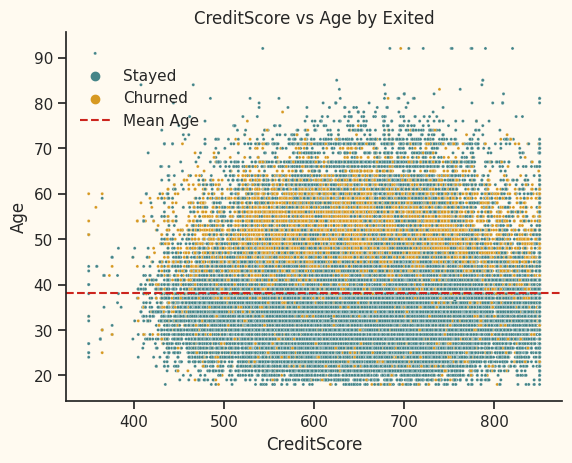

In [155]:
bivariate_plot(df_mod,'CreditScore', 'Age', hue_feat='Exited',chart_type='scatter')
plt.show()

Plot above shows that generally, most users who churned are above the mean age of our sample population

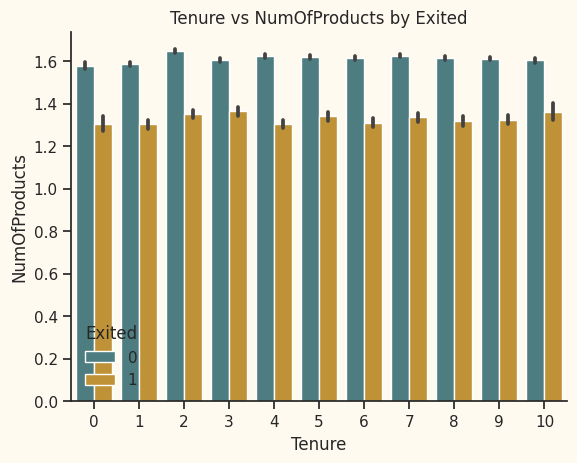

In [169]:
bivariate_plot(df_mod,'Tenure', 'NumOfProducts', hue_feat='Exited',chart_type='bar')
plt.show()

Looks like the number of product a user owns tends to be higher among the users that did not churn. Tenure does not appear to affect the number of products owned

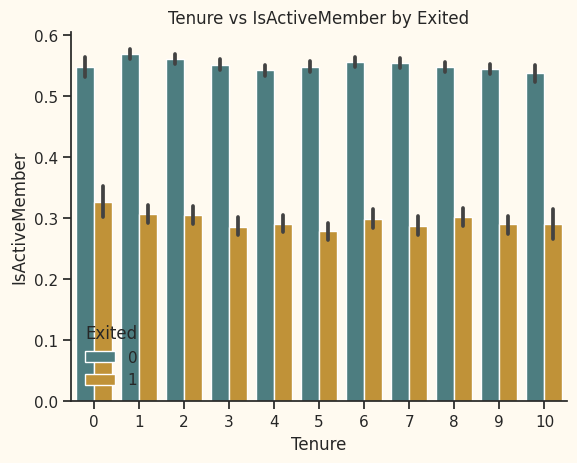

In [170]:
bivariate_plot(df_mod,'Tenure', 'IsActiveMember', hue_feat='Exited',chart_type='bar')
plt.show()

Lower activity rates do appear to be lower among users who churned.

### Correlation Analysis

In [160]:
def correlation_plot(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(25, 15))
    sns.heatmap(correlation_matrix, annot=False, fmt=".2f", linewidths=0.5,cmap='viridis')
    plt.title('Correlation Plot', fontsize=22)  
    plt.tight_layout()  
    plt.show()

In [161]:
df_dummies = pd.get_dummies(df_mod)

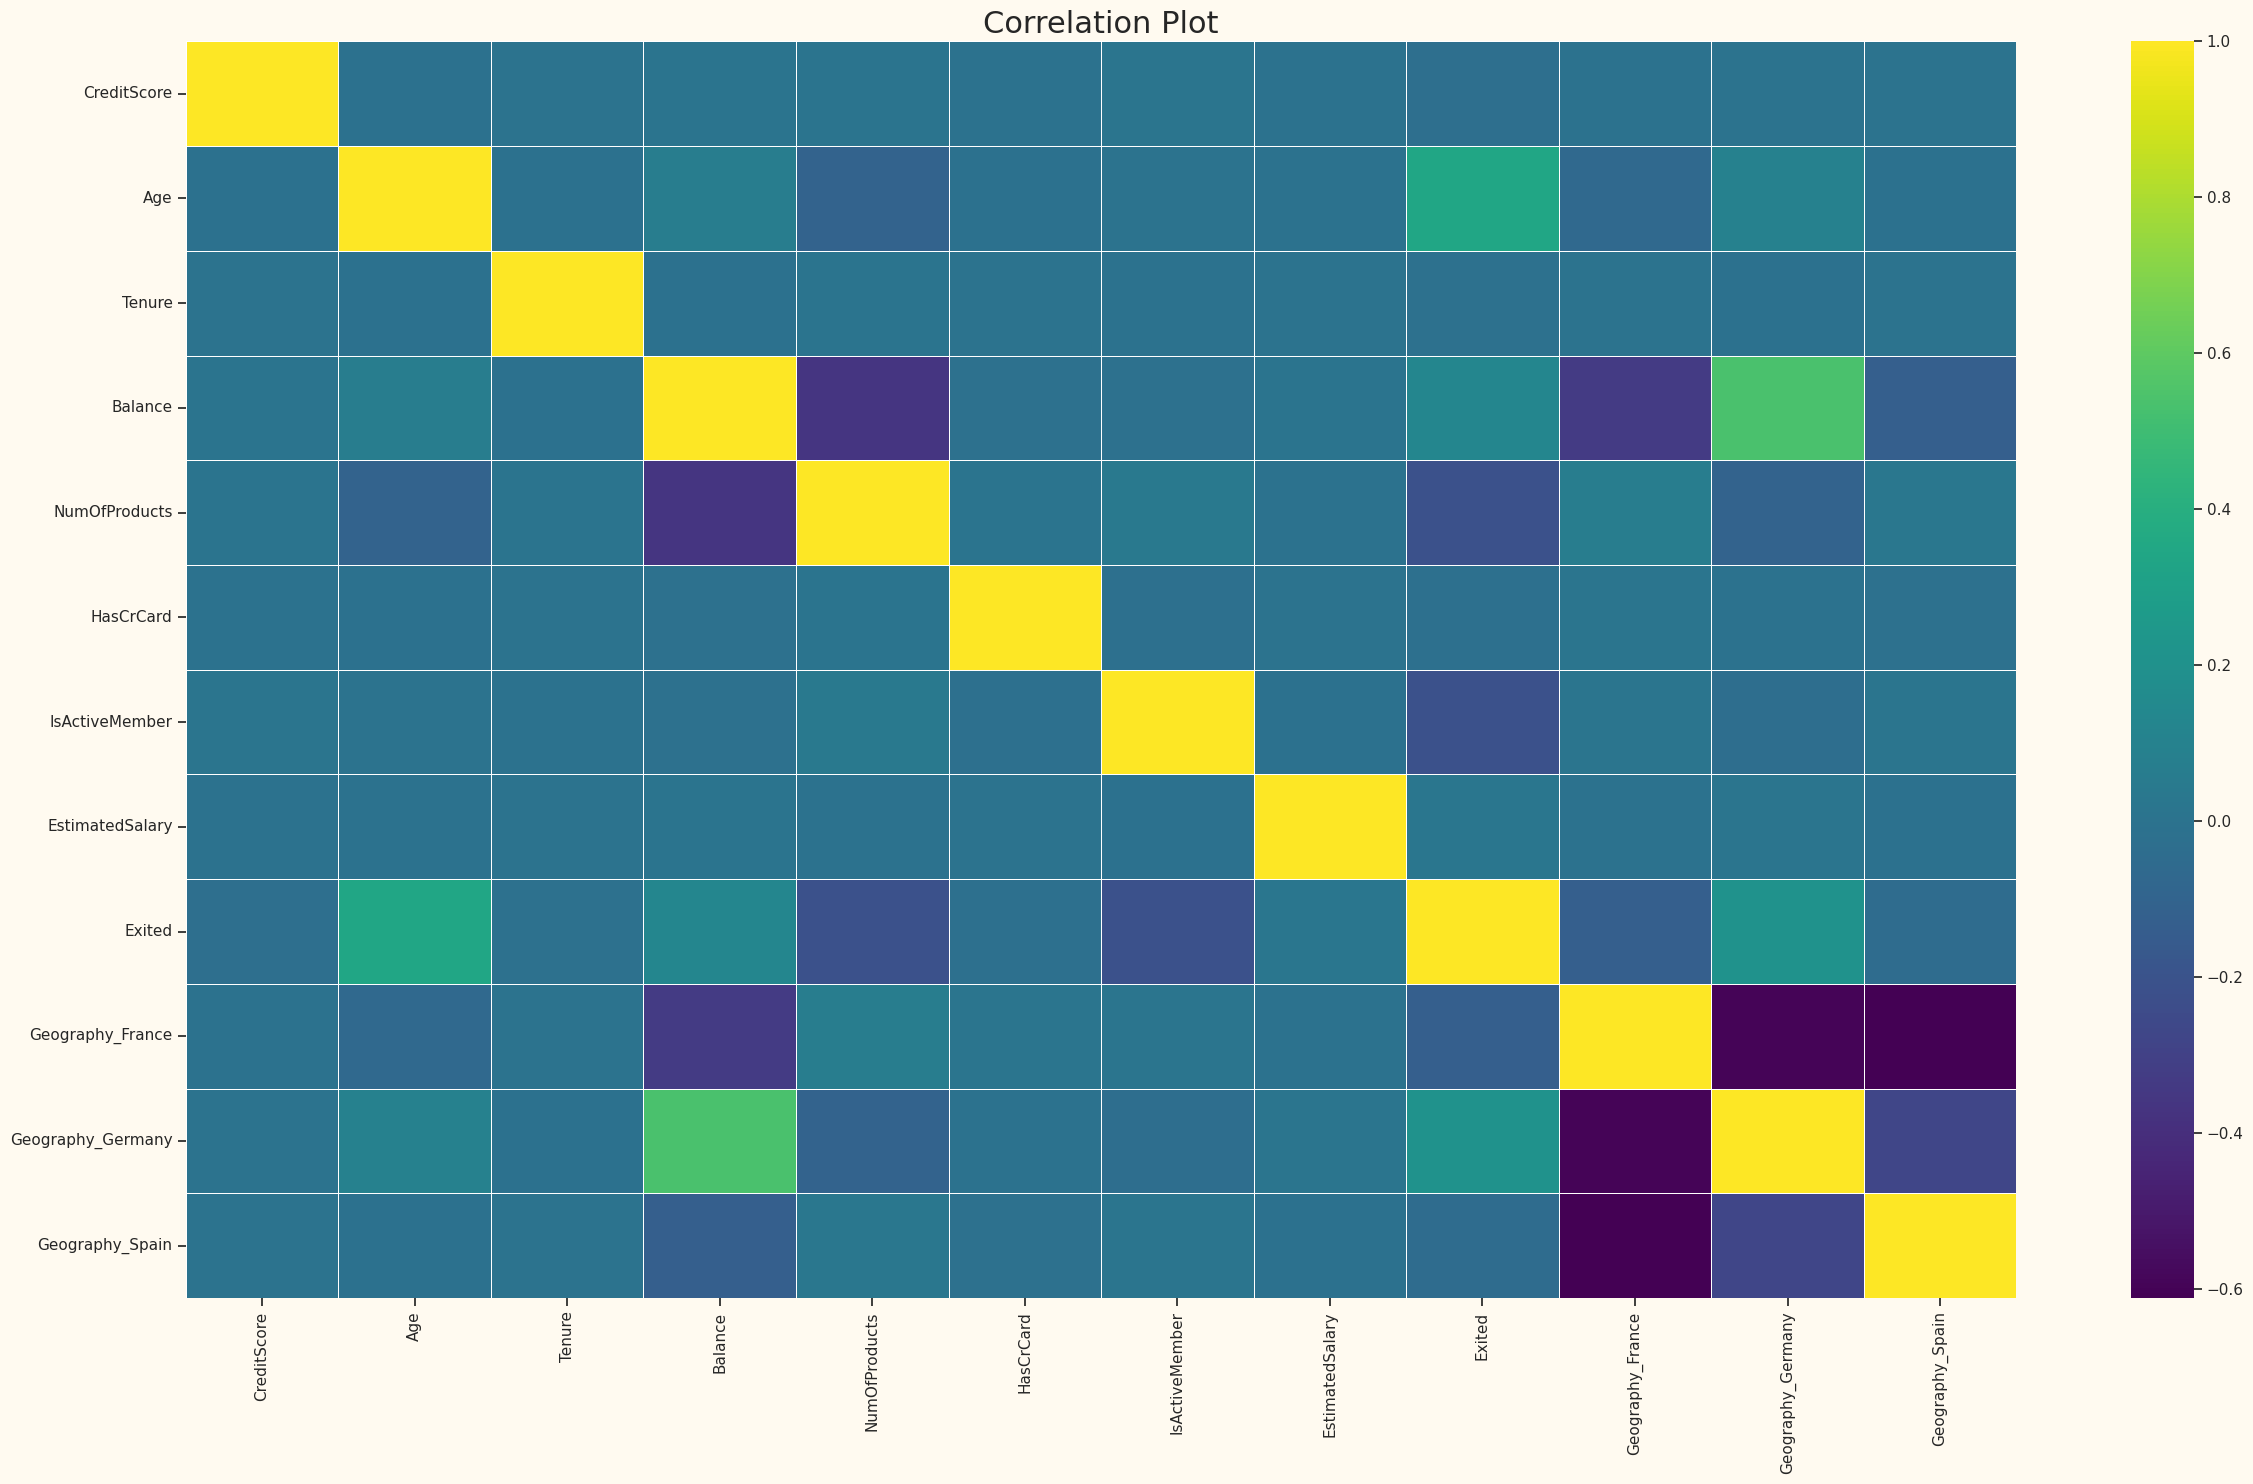

In [163]:
correlation_plot(df_dummies)

### Feature Engineering
    - May or may not need to generate new features depending on model performance

In [162]:
def feature_engineering(df):
    df['balance_to_salary'] = df['Balance'] / df['EstimatedSalary']
    df['bank_loyalty'] = df['Tenure'] / df['Age']
    return df

In [164]:
df_dummies = feature_engineering(df_dummies)

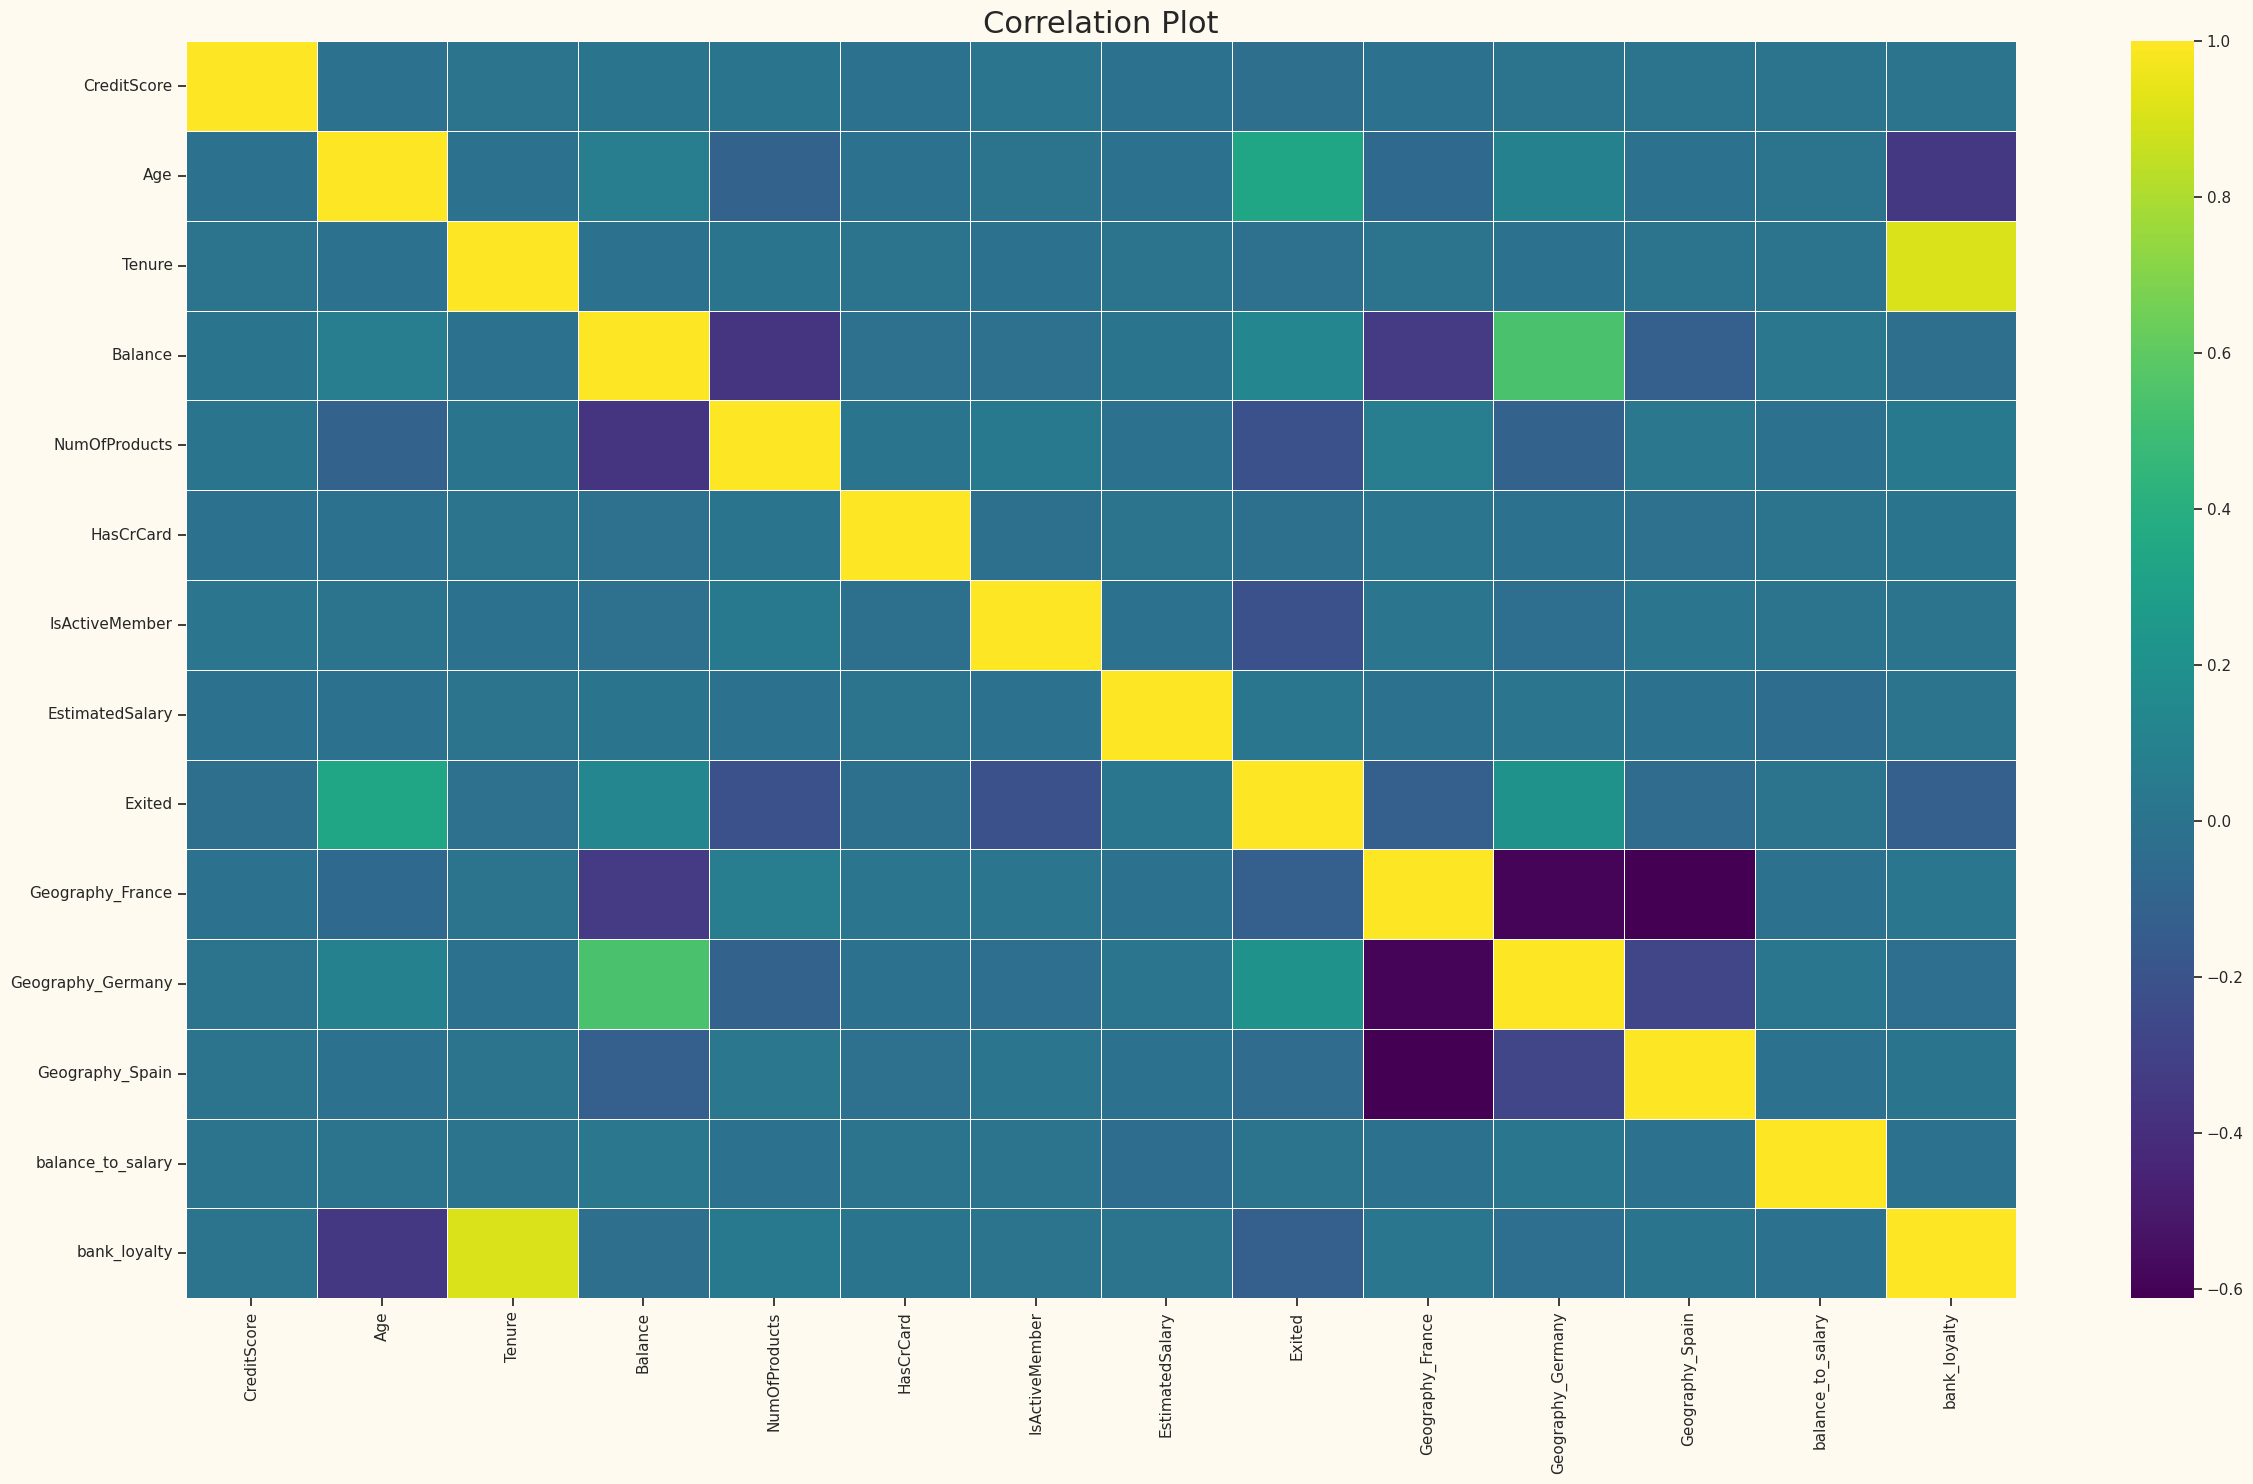

In [165]:
correlation_plot(df_dummies)

### Analyzing new features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='bank_loyalty', ylabel='Count'>

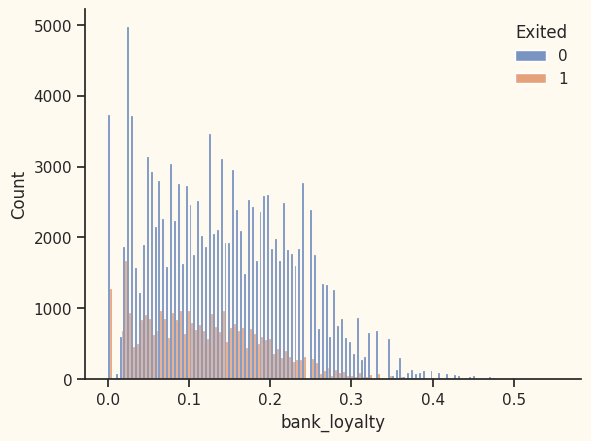

In [201]:
sns.histplot(data= df_dummies,x='bank_loyalty',hue='Exited', multiple='dodge')

Looks like churn numbers appear to drop as bank loyalty increases, may need to perform additional analysis to confirm this more rigourously.

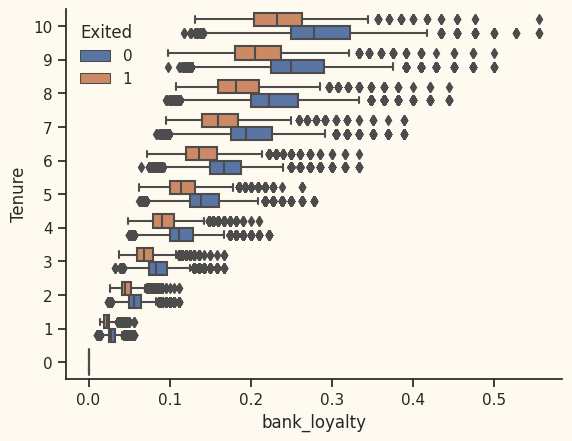

In [196]:
p = sns.boxplot(data=df_dummies, x='bank_loyalty', y='Tenure',hue='Exited',orient='h')
p.invert_yaxis()

Looks like churn numbers appear to drop as bank loyalty increases, may need to perform additional analysis to confirm this more rigourously.

### Model Building 
### **work in progress**

In [214]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pickle

In [218]:
# pickle the model to save for later
def pickling(file_name, model):
    path = '/kaggle/working/'
    with open(path + file_name,'wb') as to_write:
        pickle.dump(model,to_write)
        
def get_pickle(model):
    with open(path+model, 'rb') as to_read: 
        return pickle.load(to_read)

In [216]:
# output variable
y = df_dummies['Exited']
# predictors
X = df_dummies.copy()
X.drop('Exited',axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=0,stratify=y)

In [217]:
%%time
dt = DecisionTreeClassifier(random_state=0)
params = {
    'max_depth':[2,5,10],
    'min_samples_leaf':[2,5,10,15,20]
          }
scoring = {'accuracy', 'precision', 'recall', 'f1','roc_auc'}

clf = GridSearchCV(dt,
                   params,
                   scoring = scoring,
                   cv=5,
                   refit="roc_auc")
#clf.fit(X_train, y_train)

CPU times: user 39.2 s, sys: 8.14 ms, total: 39.2 s
Wall time: 39.3 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 5, 10],
                         'min_samples_leaf': [2, 5, 10, 15, 20]},
             refit='roc_auc',
             scoring={'accuracy', 'f1', 'roc_auc', 'recall', 'precision'})

In [219]:
# pickle the model to save for later
#pickling('DTClassifier.pickle',clf)
clf = get_pickle('DTClassifier.pickle')

In [220]:
def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    """
    # Get all the results from the CV and put them in a df.
    cv_results = pd.DataFrame(model_object.cv_results_)
    # Isolate the row of the df with the max(mean f1 score).
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]
    # Extract accuracy, precision, recall, and f1 score from that row.
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    roc_auc = best_estimator_results.mean_test_roc_auc

    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy],
                          'Roc AUC': [roc_auc]
                        } )
    return table



In [221]:
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision','Accuracy','Roc AUC'])
result_table_1 = make_results("Tuned Decision Tree", clf)
result_table_1

,Model,F1,Recall,Precision,Accuracy,Roc AUC
0,Tuned Decision Tree,0.61612,0.540376,0.716621,0.857508,0.872858


In [223]:
clf.best_params_

{'max_depth': 10, 'min_samples_leaf': 20}

### Test Random Forest Classifier

In [222]:
%%time
dt = RandomForestClassifier(random_state=0)
params = {
    'n_estimators':[15,30,50],
    'max_depth':[2,5,10],
    'min_samples_leaf':[2,5,10,15,20],
    'max_samples': [0.1,0.5]
        }

rf_clf = GridSearchCV(dt,
                   params,
                   cv=5,
                   refit="roc_auc")
#rf_clf.fit(X_train, y_train)

CPU times: user 10min 42s, sys: 627 ms, total: 10min 43s
Wall time: 10min 45s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 5, 10], 'max_samples': [0.1, 0.5],
                         'min_samples_leaf': [2, 5, 10, 15, 20],
                         'n_estimators': [15, 30, 50]},
             refit='roc_auc')

In [224]:
rf_clf.best_params_

{'max_depth': 10,
 'max_samples': 0.5,
 'min_samples_leaf': 5,
 'n_estimators': 50}

In [228]:
# pickle the model to save for later
#pickling('RFClassifier.pickle',rf_clf)
rf_clf = get_pickle('RFClassifier.pickle')

In [231]:
# predictions
y_pred = rf_clf.predict(X_test)
roc_auc = roc_auc_score(y_test,y_pred)
print(f'Roc AUC score:{roc_auc}')

Roc AUC score:0.744846063343531


In [232]:
# prediction single decision tree
y_pred = clf.predict(X_test)
roc_auc = roc_auc_score(y_test,y_pred)
print(f'Roc AUC score:{roc_auc}')

Roc AUC score:0.744846063343531


### Gradient Boosting method

In [233]:
from xgboost import XGBClassifier, plot_importance

In [234]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

cv_params = {
    'max_depth': [4,5,6,7,8],
    'min_child_weight':[1,2,3,4,5],
    'learning_rate': [0.1,0.2,0.3],
    'n_estimators': [100,125,150]
}

scoring = {'accuracy', 'precision', 'recall','f1','roc_auc'}
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [239]:
%%time
#xgb_cv.fit(X_train,y_train)

CPU times: user 1h 22min 43s, sys: 16.5 s, total: 1h 22min 59s
Wall time: 24min 2s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 125, 150]},
             refit='roc_auc',
             scoring={'accuracy', 'f1', 'roc_auc', 'recall', 'precision'})

In [240]:
# save model for later
#pickling('XGBClassifier.pickle',xgb_cv)
xgb_cv_p = get_pickle('XGBClassifier.pickle')

In [241]:
xgb_cv_p.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 4,
 'n_estimators': 150}

In [242]:
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision','Accuracy','Roc AUC'])
result_table = make_results("XGBoost", xgb_cv)
result_table

,Model,F1,Recall,Precision,Accuracy,Roc AUC
0,XGBoost,0.630559,0.552786,0.733859,0.862945,0.883843


### Model comparison
    - Looks like xgboosts tree has generally better performance over a tuned decision tree, but only slightly
    - May be able to extract better performance by continuing to tune the XGBoost model
    - The random forest tree needs to be re-tuned (likely needs more estimators) as its performance is less
    than the tuned decision tree

In [243]:
comparison = pd.concat([result_table,result_table_1])
comparison

,Model,F1,Recall,Precision,Accuracy,Roc AUC
0,XGBoost,0.630559,0.552786,0.733859,0.862945,0.883843
0,Tuned Decision Tree,0.616120,0.540376,0.716621,0.857508,0.872858


### Generate output & feature importance
    - Looks like in this dataset / model, Age, creditscore, and balance are the top 3 features with the highest f-score

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

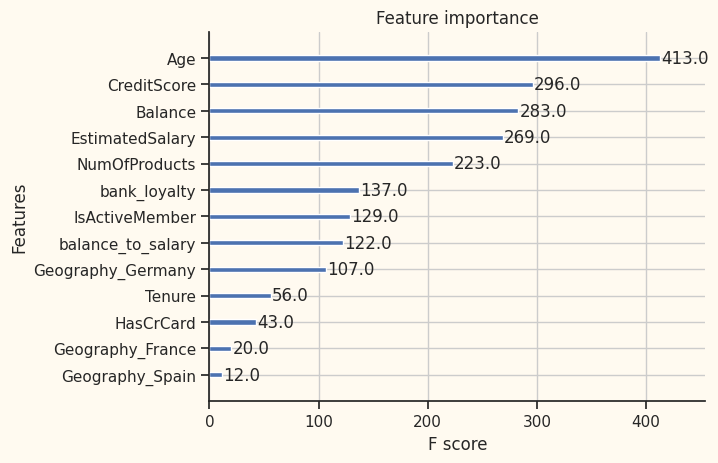

In [244]:
plot_importance(xgb_cv.best_estimator_)